# MDI220
# Statistics

# Project 

This is the project for the course on statistics.

You must fill this notebook and upload it on eCampus, **including figures**. Please make sure that it runs **without erros**.

You can work in teams but the final notebook, including text and code, must be **yours**. Any copy-pasting across students is strictly forbidden.

Please provide **concise answers** and **concise code**, with comments when appropriate.

## Your name: MERIEM NAJI

## Imports

Please do **not** import any other library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm, chi2, gaussian_kde

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import seaborn as sns


## Data

We consider the **daily electric power consumption** (in MW) in France in the period 2013-2023. The dataset is available on **eCampus**. 

Detailed information on this dataset is available [here](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [5]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [6]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [7]:
regions = list(df.region.unique())

In [8]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [9]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [10]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int32

In [11]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

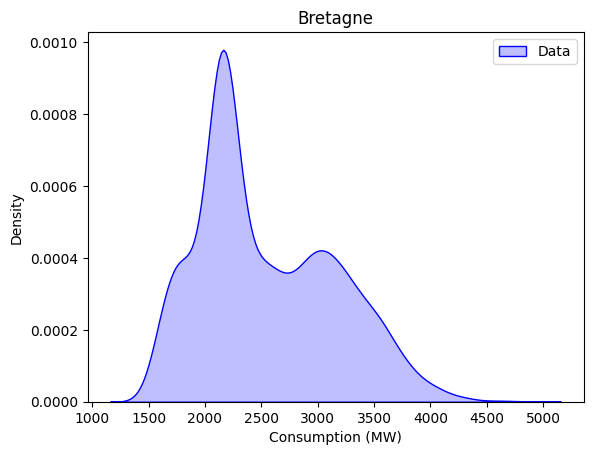

In [12]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()



## A. Parameter estimation

In all the project, the daily power consumptions are assumed to be i.i.d., with a Gaussian distribution. 

We use the following estimators for the mean and the variance, given $n$ observations $x_1,\ldots,x_n$:
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
The corresponding estimate of the standard deviation is:
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Consider the region Bretagne. 

1. Show that the estimators for the mean and the variance are unbiased.

Answer:
1) For the estimator of the mean:
Let $ \mu =\mathbb{E}[X_1]$
$$\mathbb{E}[\hat \mu]=\frac{1}{n}\sum_{i=1}^{n} \mathbb{E}[X_i]=\frac{1}{n} n\mu =\mu $$ 
So it is unbaised

2) For the estimator of tha variance:
Let $\sigma^2=\text{var}(X_1)$
$$\mathbb{E}[\hat \sigma^2]=\frac{1}{n-1}\sum_{i=1}^{n}\mathbb{E}((X_i-\frac{1}{n}\sum_{j=1}^{n}X_j)^2)$$
Or    
 $$ \mathbb{E}(X_i-\frac{1}{n}\sum_{j=1}^{n}X_j)=0 $$
so $ \mathbb{E}((X_i-\frac{1}{n}\sum_{j=1}^{n}X_j)^2)=\text{Var}((X_i-\frac{1}{n}\sum_{j=1}^{n}X_j))$
Then :
$$ \text{Var}((X_i-\frac{1}{n}\sum_{j=1}^{n}X_j))=\text{var}(X_i-\frac{1}{n}X_i -\frac{1}{n}\sum_{\substack{j=1 \\ j \neq i}}^{n}X_j)$$
$$=\text{var}((1-\frac{1}{n})X_i)+ \frac{1}{n^2}\sum_{\substack{j=1 \\ j \neq i}}^{n}\text{var}(X_j)$$
$$=(\frac{n-1}{n})^2 \sigma^2 +\frac{1}{n^2}(n-1)\sigma^2 $$
$$=\frac{n-1}{n}\sigma^2$$
So $\mathbb{E}[\hat \sigma^2]=\sigma^2$ . Thus, this estimator is unbaised

2. Give the values obtained for the mean and the standard deviation using these estimators.

In [13]:
#The value of the mean using mean  estimator:

consumption=np.array(df[df["region"] == "Bretagne"]["consumption"])
mean=sum(consumption)/len(consumption)
print("The mean is: ", mean)
#The value of the standard deviation using mean dtandard deviation estimator:

std_deviation =np.sqrt((1/(len(consumption)-1))*sum((consumption-mean)**2))
print("the standard deviation is : ",std_deviation)


The mean is:  2546.536155666579
the standard deviation is :  604.9429842099305


3. Generate new data using the corresponding Gaussian model, with the same number of samples.

In [14]:
#the number of samples in our case is len(df_region["consumption"])
Ndata = np.random.normal(mean, std_deviation,len(df_region["consumption"]))


4. Plot the *kde* (kernel density estimate) of real data and the *kde* of generated data on the same figure.

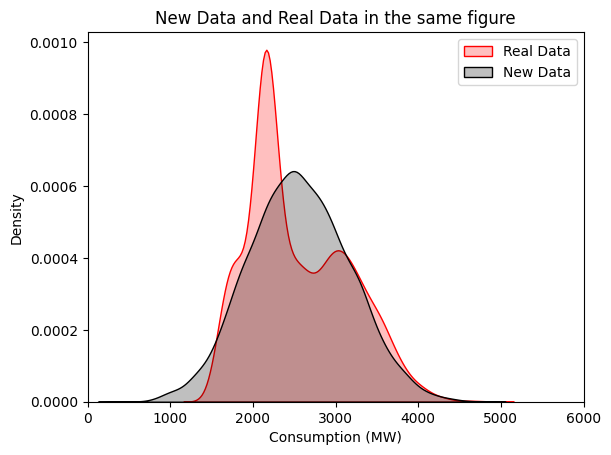

In [15]:
# Tracé des anciennes et nouvelles données sur le même graphe:
df_region = df[df.region == "Bretagne"]
sns.kdeplot(data=df_region,x="consumption", label="Real Data", color='red', fill=True)
sns.kdeplot(Ndata , label="New Data", color='black', fill=True)

plt.title("New Data and Real Data in the same figure")
plt.xlabel("Consumption (MW)")
plt.xlim(0, 6000)
plt.legend()
plt.show()

5. Do the same for the days corresponding to winter (from December 22 to March 21), after updating the model.

In [16]:
#Data of winter of all years

df = pd.read_csv(filename)
df['date'] = pd.to_datetime(df['date'])
combined_filtered_df= pd.DataFrame()

#Add the first period of winter of 2013 (only from 2013-01-01 to 2013-03-21 ):

start_date_2013 = pd.to_datetime("2013-01-01")
end_date_2013 = pd.to_datetime("2013-03-21")
winter_df_2013 = df[(df['date'] >= start_date_2013) & (df['date'] <= end_date_2013)]
combined_filtered_df =pd.concat([ combined_filtered_df , winter_df_2013])

# choose the wanted period of winter for all years  :
years = range(2013, 2024)  
for year in years:
    filtered_df_year = df[(df['date'] >= pd.to_datetime(f"{year}-12-22")) & (df['date'] <= pd.to_datetime(f"{year + 1}-03-21"))]
    combined_filtered_df = pd.concat([combined_filtered_df, filtered_df_year]) 
print(combined_filtered_df)

# we could here instead  of adding the first period of 2013, do the for in range(2012,2023)

                     region       date  consumption
0      Auvergne-Rhône-Alpes 2013-01-01         7560
1      Auvergne-Rhône-Alpes 2013-01-02         8700
2      Auvergne-Rhône-Alpes 2013-01-03         9367
3      Auvergne-Rhône-Alpes 2013-01-04         9133
4      Auvergne-Rhône-Alpes 2013-01-05         8283
...                     ...        ...          ...
45560         Île-de-France 2023-03-17         7780
45561         Île-de-France 2023-03-18         7104
45562         Île-de-France 2023-03-19         7168
45563         Île-de-France 2023-03-20         8218
45564         Île-de-France 2023-03-21         7783

[11784 rows x 3 columns]


In [39]:
#the mean and the standard deviation of winter period :
Con=combined_filtered_df[combined_filtered_df["region"] == "Bretagne"]["consumption"]
meanW=sum(Con)/len(Con)
print("The mean is: ", meanW,)
std_deviationW = combined_filtered_df[combined_filtered_df["region"] == "Bretagne"]["consumption"].std()
print("the standard deviation is : ",std_deviationW)


The mean is:  3214.1782077393077 982
the standard deviation is :  409.4763740819989


In [18]:
#The number of samples is len(dfW_region["consumption"])
dfW_region = combined_filtered_df[combined_filtered_df.region == "Bretagne"]
NWinterdata = np.random.normal(meanW, std_deviationW,len(dfW_region["consumption"]))

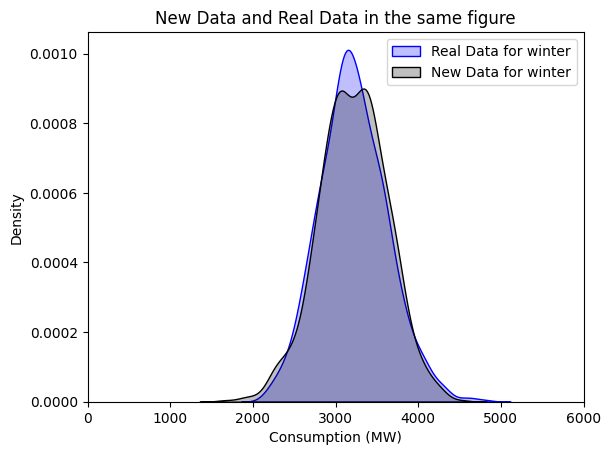

In [19]:
# Tracé des ancienne et nouvelle data sur le même graphe(pour la période winter)

sns.kdeplot(data=dfW_region,x="consumption", label="Real Data for winter", color='blue', fill=True)
sns.kdeplot(NWinterdata , label="New Data for winter", color='black', fill=True)

plt.title("New Data and Real Data in the same figure")
plt.xlabel("Consumption (MW)")
plt.xlim(0, 6000)
plt.legend()
plt.show()

6. In which case the Gaussian model seems more appropriate?

Answer :

In the second case ( winter days), the Gaussian model seems more appropriate

## B. Goodness of fit

We would like to confirm and quantify the observation of part A.

We propose the following metric to measure the dissimilarity between two pdf $f$ and $g$ (with respect to the Lebesgue measure):
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Show that $d(f,g) \in [0,1]$, with $d(f,g)=0$ if and only if $f=g$ almost everywhere (for the Lebesgue measure) and $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.

Answser:

1) We know that f and g are pdf so they are positive and $ \int f(x)\mathrm dx$ =1 $ \int g(x)\mathrm dx$ =1
Thus:
$$
0 \leq  \int |f(x) - g(x)| \mathrm dx \leq \int |f(x)| \mathrm dx + \int |g(x)| \mathrm dx $$
$\Rightarrow$ $$ 0 \leq  \int |f(x) - g(x)| \mathrm dx \leq \int f(x) \mathrm dx + \int g(x) \mathrm dx$$
$\Rightarrow$  $$ 0 \leq \int |f(x) - g(x)| \mathrm dx \leq 2 $$
$\Rightarrow$  $$ 0 \leq d(f, g) \leq 1 $$



2) $$ d(f, g) = 0 \Leftrightarrow \int |f(x) - g(x)| \mathrm dx =0 $$
And we have that $ |f(x) - g(x)| \geq 0 $ Thus:
$$ |f(x) - g(x)|=0  \  \forall x $$
Hence  $$ d(f, g) = 0 \Leftrightarrow   f=g $$



3) we have here the case of equality of the triangular inequality so by definition :


Let  $d(f,g)=1$, montrons que $supp(f)∩supp(g)=∅$

Par absurde on suppose que $$supp(f)\cap supp(g)\neq ∅$$


We put $$ H=  (supp(f) \backslash supp(g))\cup (supp(g) \backslash supp(f))\cup (supp(f) \cap supp(g)) $$

Then $$\mathbb{R} = H \cup (\mathbb{R} \backslash H )$$

On a donc:
$ \int_{\mathbb{R}} \left| f - g \right| \, dx =\int_{\text{supp}(f) \setminus \text{supp}(g)} f(x) \, dx+\int_{\text{supp}(g) \setminus \text{supp}(f)} g(x) \, dx +\int_{\text{supp}(f) \cap \text{supp}(g)} \left| f - g \right| \, dx=2$

And we have $$ \int_{\text{Supp(f)}} f(x) \, dx  + \int_{\text{Supp(g)}} g(x) \, dx =2 $$


$$\int_{\text{supp}(f) \setminus \text{supp}(g)} f(x) \, dx+ \int_{\text{Supp(f)}} f(x) \, dx +\int_{\text{Supp(g)}} g(x) \, dx -\int_{\text{supp}(g) \setminus \text{supp}(f)} g(x) \, dx = \int_{\text{supp}(f) \cap \text{supp}(g)} \left| f - g \right| \, dx $$
But $$ \int_{\text{Supp(f)}} f(x) \, dx -\int_{\text{supp}(f) \setminus \text{supp}(g)} f(x) \, dx = \int_{\text{Supp(g)}} f(x) \, dx $$
Thus, we have $$ \int_{\text{Supp(g)}} f(x) \, dx + \int_{\text{Supp(f)}} g(x) \, dx = \int_{\text{supp}(f) \cap \text{supp}(g)} \left| f - g \right| \, dx \leq \int_{\text{supp}(f) \cap \text{supp}(g)}f(x) \, dx + \int_{\text{supp}(f) \cap \text{supp}(g)}g(x) \, dx$$
Then 

$$ \int_{\text{Supp(f)}} g(x) \, dx -  \int_{\text{supp}(f) \cap \text{supp}(g)}g(x) \, dx \leq \int_{\text{supp}(f) \cap \text{supp}(g)}f(x) \, dx  - \int_{\text{Supp(g)}} f(x) \, dx $$

But we have $ Supp(f) \cap Supp(g) = \emptyset$ and $ Supp(f) \cap Supp(g) \subseteq Supp(f) $
Then $$ \int_{\text{Supp(f)}} g(x) \, dx  - \int_{\text{supp}(f) \cap \text{supp}(g)}g(x) \, dx \geq 0 \ ( g\ est\ positive) $$
But $$ \int_{\text{supp}(f) \cap \text{supp}(g)}f(x) \, dx - \int_{\text{Supp(g)}} f(x) \, dx < 0 $$  Absurde 

We deduce that $ {supp}(f) \cap {supp}(g) = \emptyset$


In fact if on a $ \int_{\text{supp}(f) \cap \text{supp}(g)}f(x) \, dx - \int_{\text{Supp(g)}} f(x) \, dx = 0 $ Then $supp(f) \subseteq supp(g)$

$\Rightarrow \int_{\text{supp}(g)}f(x) \, dx +\int_{\text{supp}(g)}g(x) \, dx = 2 = \int_{\text{supp}(g)} \left| f - g \right| \, dx $

$\Rightarrow \int_{\text{supp}(g)}f+g- \left| f - g \right| \, dx$

D'où $f+g- \left| f - g \right|$ est nul sur $supp(g)$  ($ f+g ≥ \left| f - g \right|$ ), so particularly in $supp(f)$ 

The other implication si trivial

2. For the region Bretagne, compute the dissimilarity between the *kde* of real data and the density of the Gaussian model.

In [20]:


# We will use the gaussian_kde

kde = gaussian_kde(df_region["consumption"])
kde2 = gaussian_kde(Ndata) #Ndata our generated data

x = np.linspace(min(df_region["consumption"].min(), Ndata.min()), max(df_region["consumption"].max(), Ndata.max()), 1000)

values_of_real_data = kde(x)

values_of_new_data = kde2(x)

# Calculate the absolute difference between the two KDEs

diff = np.abs(values_of_real_data - values_of_new_data)

# calculate the dissimilarity
d = 0.5*np.trapz(diff, x)
print(d)

0.15738369831368748


3. Do the same for the region Bretagne in winter and check your conclusion of part A.

In [21]:


# We will use the gaussian_kde

kde = gaussian_kde(dfW_region["consumption"])
kde2 = gaussian_kde(NWinterdata)
x = np.linspace(min(dfW_region["consumption"].min(), NWinterdata.min()), max(dfW_region["consumption"].max(), NWinterdata.max()), 1000)

values_of_dataW = kde(x)

values_of_new_dataW = kde2(x)

# Calculate the absolute difference between the two KDEs
abs_diff = np.abs(values_of_dataW - values_of_new_dataW)

# calculate the dissimilarity
dW = 0.5*np.trapz(abs_diff, x)
print(dW)

0.0492614888123209


4. Do the same for all regions. Give the result as a single dataframe.

In [22]:

#On écrit ici une fonction qui prend en argument la région et calcule dessimilarité

def dessimilarity(df1,region1,m,sigma): #qui prend en argument data et region 
    df_region1 = df1[df1.region == region1]
    kde_1 = gaussian_kde(df_region1["consumption"])
    NData1 = np.random.normal(m, sigma,len(df_region1["consumption"]))
    kde_2 = gaussian_kde(NData1)
    x1 = np.linspace(min(df_region1["consumption"].min(), NData1.min()), max(df_region1["consumption"].max(), NData1.max()), 1000)

    values_of_data1 = kde_1(x)

    values_of_new_data1 = kde_2(x)

    # Calculate the absolute difference between the two KDEs
    abs_diff1 = np.abs(values_of_data1 - values_of_new_data1)
    d1 = 0.5*np.trapz(abs_diff1, x1)
    return d1


In [23]:

dessimilarties_per_region_df=pd.DataFrame(columns=['Region', 'Dissimilarity','Dissimilarity In winter'])
i=0
for region in regions: 
    df_region = df[df.region == region]
    m=df[df["region"] == region]["consumption"].mean().astype(int)
    mW=combined_filtered_df[combined_filtered_df["region"] == region]["consumption"].mean().astype(int)
    si=df[df["region"] == region]["consumption"].std()
    siW=combined_filtered_df[combined_filtered_df["region"] == region]["consumption"].std()
    d=dessimilarity(df,region,m,si)
    dw=dessimilarity(combined_filtered_df,region,mW,siW)
    dessimilarties_per_region_df.loc[i] =[region, d, dw]
    
    i=i+1
print(dessimilarties_per_region_df)


    

                        Region  Dissimilarity  Dissimilarity In winter
0         Auvergne-Rhône-Alpes       0.054484                 0.000009
1      Bourgogne-Franche-Comté       0.115874                 0.037724
2                     Bretagne       0.207600                 0.042380
3          Centre-Val de Loire       0.191752                 0.049918
4                    Grand Est       0.128498                 0.008511
5              Hauts-de-France       0.084896                 0.000798
6                    Normandie       0.259046                 0.032808
7           Nouvelle-Aquitaine       0.299319                 0.012875
8                    Occitanie       0.371165                 0.034983
9             Pays de la Loire       0.236759                 0.047088
10  Provence-Alpes-Côte d'Azur       0.327703                 0.009387
11               Île-de-France       0.085985                 0.001452


5. Which region is best fitted by a Gaussian model in winter?

In most cases, the best fitted region is "Auvergne-Rhône-Alpes" , and due to the random gaussian effect the result becomes different some times and give instead "Île_de_France" and "Hauts_de_Frace"

In [24]:
RW=np.array(dessimilarties_per_region_df['Dissimilarity In winter'])
m=RW.min()
best_fitted_region=dessimilarties_per_region_df.loc[RW== m]['Region']
print("The region that is best fitted by Gaussian model in winter is : ", best_fitted_region)


The region that is best fitted by Gaussian model in winter is :  0    Auvergne-Rhône-Alpes
Name: Region, dtype: object


6. For this region and this season, plot the *kde* of real data and the *kde* of generated data on the same figure, as in part A.

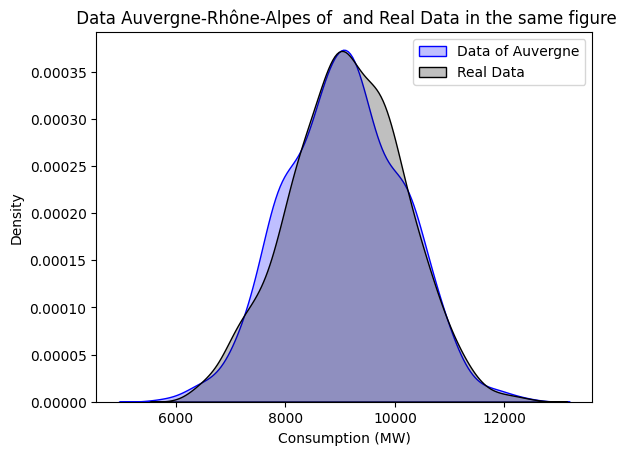

In [25]:
dff_region = combined_filtered_df[combined_filtered_df.region == "Auvergne-Rhône-Alpes"]
m3=combined_filtered_df[combined_filtered_df["region"] == "Auvergne-Rhône-Alpes"]["consumption"].mean().astype(int)
s3=dff_region["consumption"].std()
NWi = np.random.normal(m3, s3,len(dff_region["consumption"]))

sns.kdeplot(data=dff_region,x="consumption", label="Data of Auvergne", color='blue', fill=True)
sns.kdeplot(NWi , label="Real Data", color='black', fill=True)

plt.title(" Data Auvergne-Rhône-Alpes of  and Real Data in the same figure")
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

## C. Bayesian statistics

We would like to include prior knowledge on the estimation, using Bayesian statistics.

Consider the region Bretagne in winter. We focus on the mean $\mu$, assuming the standard deviation is known and equal to $\sigma=400$MW. We assume a Gaussian prior on $\mu$ with mean $\mu_0=3500$MW and standard deviation $\sigma_0=500$MW. 

1. Give the posterior distribution of $\mu$, using the parameters $\sigma$, $\mu_0$, $\sigma_0$ and the $n$ observations $x_1,\ldots,x_n$.

Answer:
The posterior distrubution of $ \mu $ is 
$$ \frac{1}{\sqrt(2\pi)  \sigma}\frac{1}{\sqrt(2\pi)  \sigma_0} exp^{\frac{-(\mu -\mu_0)^2}{2\sigma_0^2}}e^{\sum_{i=0}^{n}\frac{-(x_i -\mu_0)^2}{2\sigma^2}}

2. Give the parameters of the posterior distribution obtained for each year from 2013 to 2023, considered independently, in a single dataframe.

By doing calculs  we have that the posterior distribution  is a gaussien with :
mean equals to $ \frac{\frac{\mu_0}{\sigma_0^2}+\frac{s}{\sigma^2}}{\frac{1}{\sigma_0^2}+\frac{n}{\sigma^2}}$
with n the number os samples and $ s = \sum_{i=1}^{n}X_i$  
and variance equals to  : $\frac{1}{\frac{1}{\sigma_0^2}+\frac{n}{\sigma^2}}$

In [26]:
print(combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df["date"]== "2013-03-12"])

        region       date  consumption
7676  Bretagne 2013-03-12         4086


C:\Users\marye\AppData\Local\Temp\ipykernel_51592\516198016.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df["date"]== "2013-03-12"])


In [27]:

sigma1=400
sigma_0=500
mu_0=3500
combined_filtered_df['date'] = pd.to_datetime(combined_filtered_df['date'])
combined_filtered_df['year'] = combined_filtered_df['date'].dt.year
years = list(range(2013, 2024))
moyennes_conso = []
means=[]
var=[]
for year in years:
    moyenne = combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == year]['consumption'].mean().astype(int)
    n=len(combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == year]['consumption'])
    s=sum(np.array(combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == year]['consumption']))
    postm=((mu_0/(sigma_0**2)) +(s/(sigma1**2)))/((1/(sigma_0**2)) +(n/(sigma1**2)))
    postvar=1/((1/(sigma_0**2))+(n/(sigma1**2)))
    means.append(postm)
    var.append(postvar)
    moyennes_conso.append(moyenne)
    
nouveau_winterbretagne_df = pd.DataFrame({'year': years, 'MoyenneConsommation': moyennes_conso,'postmean':means,'postvariance':var})

print(nouveau_winterbretagne_df)
#pour l'année 2023 que pour les 3 premiers mois du 2023


C:\Users\marye\AppData\Local\Temp\ipykernel_51592\1354985122.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  moyenne = combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == year]['consumption'].mean().astype(int)
C:\Users\marye\AppData\Local\Temp\ipykernel_51592\1354985122.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n=len(combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == year]['consumption'])
C:\Users\marye\AppData\Local\Temp\ipykernel_51592\1354985122.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s=sum(np.array(combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == year]['consumption']))
C:\Users\marye\AppData\Local\Temp\ipykernel_51592\1354985122.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  moyenn

    year  MoyenneConsommation     postmean  postvariance
0   2013                 3342  3343.413504   1765.225066
1   2014                 3115  3118.424537   1765.225066
2   2015                 3165  3167.398500   1765.225066
3   2016                 3205  3207.507639   1745.962462
4   2017                 3249  3251.224625   1765.225066
5   2018                 3313  3315.081642   1765.225066
6   2019                 3193  3195.200794   1765.225066
7   2020                 3143  3145.504147   1745.962462
8   2021                 3340  3341.946161   1765.225066
9   2022                 3162  3165.081642   1765.225066
10  2023                 3114  3117.547123   1984.126984


C:\Users\marye\AppData\Local\Temp\ipykernel_51592\1354985122.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s=sum(np.array(combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == year]['consumption']))
C:\Users\marye\AppData\Local\Temp\ipykernel_51592\1354985122.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  moyenne = combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == year]['consumption'].mean().astype(int)
C:\Users\marye\AppData\Local\Temp\ipykernel_51592\1354985122.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n=len(combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == year]['consumption'])
C:\Users\marye\AppData\Local\Temp\ipykernel_51592\1354985122.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s=sum(

3. Plot the density of the posterior distribution in 2023 and the *kde* of real data in 2023 on the same plot.

C:\Users\marye\AppData\Local\Temp\ipykernel_51592\3139394065.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nbsamples=len(combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == 2023]['consumption'])
C:\Users\marye\AppData\Local\Temp\ipykernel_51592\3139394065.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(data=combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == 2023], x="consumption", label="Real Data", color='blue', fill=True)


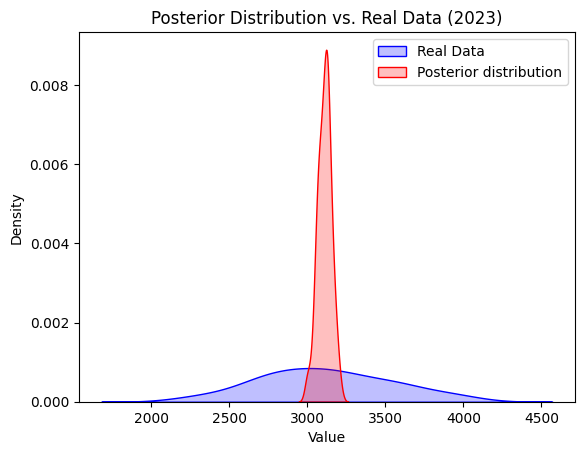

In [28]:
m=nouveau_winterbretagne_df[nouveau_winterbretagne_df["year"]==2023]["postmean"]
v=nouveau_winterbretagne_df[nouveau_winterbretagne_df["year"]==2023]["postvariance"]

nbsamples=len(combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == 2023]['consumption'])

data2023 = np.random.normal(m, np.sqrt(v), nbsamples)
sns.kdeplot(data=combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == 2023], x="consumption", label="Real Data", color='blue', fill=True)
sns.kdeplot(data2023, label="Posterior distribution", color='red', fill=True)
# Add labels and legend
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Posterior Distribution vs. Real Data (2023)")
plt.legend()

# Show the plot
plt.show()
    

4. Discuss the results, comparing to those obtained in part A.

Your answer:

The results are adequates because of the fact that posterior distribution was done after various observations so it gives more information about distribution (The variance is nul when n is too large). So that confirms the posterior distribution and the real data are different.

## D. Hypothesis testing

Consider the region Bretagne. While the standard deviation is equal to 400MW in winter, you would like to test the hypothesis that it was 500MW in 2023. The mean is supposed to be known and equal to 3200MW.
1. Propose a statistical test at level $\alpha$.

Answer:
We have the case of a simple test with $ \theta_0 =400MW $ and $\theta_1 = 500MW $ . So we consider the UMP statical test is :
$$ \delta(x) = \mathbb{1}_{\frac{p_1(x)}{p_0(x)} \geq c} \forall c $$
with $$ \frac{p_1(x)}{p_0(x)} \ \propto \ \frac{ e^{-\frac{1}{2\theta_1^2} \sum_{i=1}^n (x_i - \mu)^2}}{e^{-\frac{1}{2\theta_0^2} \sum_{i=1}^n (x_i - \mu)^2}} \ $$
$$ \Rightarrow \frac{p_1(x)}{p_0(x)} \ \propto \exp^{\frac{1}{2}(\frac{1}{\theta_0^2}-\frac{1}{\theta_1^2})S}$$
Such that $ S=\sum_{i=1}^{n}(x_i-\mu)^2 $
And we have  here $ \theta_0 \leq \theta_1 $ a uniformly most powerful test is given by : $ \delta(x )= \mathbb{1}_{S \leq c}  $ 
for some constant $ c\geq 0 \,\ S \sim  \theta^2 Y $ such that $ Y \sim \chi^2(n)$
Hence $$ \alpha = P_0(S > c) = P_0(\theta^2 Y > c)= P_0(Y > \frac{c}{\theta^2}) $$
we define hence the quantile fonction of the $\chi^2(n)$  distribution $ Q $ :
$$ \frac{c}{\theta_0^2}= Q(1-\alpha)$$
$$\Rightarrow c=Q(1-\alpha)\theta_0^2


2. Provide the result of this test for $\alpha=1\%$.

In [38]:
from scipy.stats import chi2
n=80
quantile = chi2.ppf(0.99, n)
teta0=400
c=(teta0**2)*quantile
print(len(combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == 2023]['consumption']))
s=0
mu=3200
for element in combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == 2023]['consumption']:
    s+=(element-mu)**2
print(s,c)



80
14600063 17972606.803247597


C:\Users\marye\AppData\Local\Temp\ipykernel_51592\1435393362.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == 2023]['consumption']))
C:\Users\marye\AppData\Local\Temp\ipykernel_51592\1435393362.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for element in combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == 2023]['consumption']:


So we have here the hypothesis $H_0$ is the correct one and $H_1$ is rejected

## E. Testing independence

Consider the power consumption in Bretagne and Provence-Alpes-Côte d'Azur in winter. 

1. Visualize the joint distribution of power consumption in these 2 regions using seaborn.

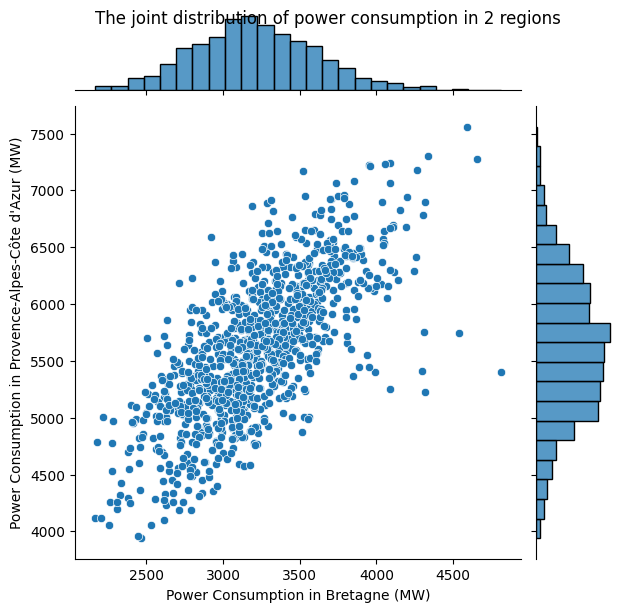

In [30]:
df_1=combined_filtered_df[combined_filtered_df['region']=="Bretagne"]["consumption"]
df_2=combined_filtered_df[combined_filtered_df['region']== "Provence-Alpes-Côte d'Azur"]["consumption"]
k=sns.jointplot( x=np.array(df_1), y=np.array(df_2))
k.ax_joint.set_xlabel("Power Consumption in Bretagne (MW)")
k.ax_joint.set_ylabel("Power Consumption in Provence-Alpes-Côte d'Azur (MW)")
k.fig.suptitle("The joint distribution of power consumption in 2 regions")

# Show the plot
plt.show()




2. Do you think the power consumption in these two regions is independent?

Answer:
Observing how the points are distributed, we recognize a concentrated presence aroud the y=x axis this suggests that the two distributions are dependant


3. Propose a chi-2 test for the independence of the power consumption in these two regions at level $\alpha$. 

Answer :
We define first $ A_1,....,A_K $ and $ B_1,....,B_L$ two partitions of the value space
Let $ N_i = \sum_{l=1}^{n}\mathbb{1}_{X_l \in A_i } $ and $ N_j = \sum_{h=1}^{n}\mathbb{1}_{Y_h \in B_j }$ and
 $ N_{i,j}=\sum_{t=1}^{n}\mathbb{1}_{X_t \in A_i \,\ Y_t \in B_j }$
$$ \delta(x,y) = \mathbb{1}_{T(x,y) \geq c}  \ \forall c $$ 
such that $$ T(x,y)=\sum_{i,j} \frac{(N_{i,j}-\frac{N_iN_j}{n})^2}{\frac{N_iN_j}{n}}$$ and 
so the ndependence is rejected whenever $ T (x, y) \gt c $



In [31]:
#I chose in this case to make a partition of 3 sets for each region "Brittany" & "Provence-Alpes-Côte d'Azur"
df_1=combined_filtered_df[combined_filtered_df['region']=="Bretagne"]["consumption"]
df_2=combined_filtered_df[combined_filtered_df['region']== "Provence-Alpes-Côte d'Azur"]["consumption"]
d1=np.array(df_1)
d2=np.array(df_2)
NX=[0,0,0]
NY=[0,0,0]
NXY = [[0,0,0] for _ in range(3)]
n=len(df_1) #len(df_1)=len(df_2)=982
TXY=0
#la répartition de X :
NX[0]= len([x for x in np.array(df_1) if x < 3000])
print()
NX[1]= len([x for x in np.array(df_1) if x > 3000 and x < 4000])
NX[2]= len([x for x in np.array(df_1) if x > 4000 ])
#la répartition de Y:
NY[0]= len([y for y in np.array(df_2) if y < 4500])
NY[1]= len([y for y in np.array(df_2) if y > 4500 and y < 5500])
NY[2]= len([y for y in np.array(df_2) if y > 5500 ])
#la répartion du couple (X,Y)
NXY[0][0]=sum([1 for t in range(n) if d1[t]< 3000 and d2[t] < 4500])
NXY[0][1]=sum([1 for t in range(n) if d1[t]< 3000 and d2[t] > 4500 and d2[t] < 5500])
NXY[0][2]=sum([1 for t in range(n) if d1[t]< 3000 and d2[t] > 5500])
NXY[1][0]=sum([1 for t in range(n) if d1[t] > 3000 and d1[t] < 4000 and d2[t] < 4500])
NXY[1][1]=sum([1 for t in range(n) if d1[t] > 3000 and d1[t] and d2[t] > 4500 and d2[t] < 5500])
NXY[1][2]=sum([1 for t in range(n) if d1[t] > 3000 and d1[t] and d2[t] > 5500])
NXY[2][0]=sum([1 for t in range(n) if d1[t] > 4000 and d2[t] < 4500])
NXY[2][1]=sum([1 for t in range(n) if d1[t] > 4000 and d2[t] > 4500 and d2[t] < 5500])
NXY[2][2]=sum([1 for t in range(n) if d1[t] > 4000 and d2[t] > 5500])

for i in range(3):
    for j in range(3):
        denominator = (NX[i] * NY[j]) / n
        TXY += (NXY[i][j] - denominator) ** 2 / denominator
print(TXY)






299.20426386479653


In our repartion we have K=3 and L=3 so $T(X,Y) \sim \chi^2((K-1)(L-1))$
$\Rightarrow T(X,Y) \sim \chi^2(4)$


4. Give the result of this test for $\alpha=1\%$. 

In [32]:
quantile2 = chi2.ppf(0.99, 4)
print(quantile2)
print(TXY > quantile2)

13.276704135987622
True


SO we have  here $T(X,Y) \geq c$  , then we reject the hypothesis of independance and we deduce that the power consumption in Bretagne and in Province -Alpes-Côte d'Azurare dependant

## F. Confidence intervals

Consider the region Bretagne in winter. 

1. Provide a confidence interval at level $\alpha=95\%$ for the mean power consumption. 

We will use here the lower confidence bound (LCB) which is a better confidence interval than the symmetric one, and we will consider the emplirical mean the same as we calculate before for the region "Bretagne" in the winter :
We have then $[\overline{X}-\frac{c\sigma}{\sqrt n},+\infty]$

In [33]:
#Using gaussian model by considering that the variance is known
N=len(combined_filtered_df[combined_filtered_df["region"]== "Bretagne"]['consumption'])
c=norm.ppf(0.95)
mw=combined_filtered_df[combined_filtered_df["region"]== "Bretagne"]['consumption'].mean().astype(int)
sw=combined_filtered_df[combined_filtered_df["region"]== "Bretagne"]['consumption'].std().astype(int)
print(mw,sw,N,)
print("[",mw-(c*sw/np.sqrt(N)),",","+infinity]")

3214 409 982
[ 3192.531840122213 , +infinity]


In [34]:
#Using Student model by considering that both the variance and mean are unknown
from scipy.stats import t
B=combined_filtered_df[combined_filtered_df["region"]== "Bretagne"]['consumption']
n=len(B)
c_prime= t.ppf(1 - 0.05, n-1) #student distributin in this case has n-1 degrees of freedom
average_mean=(1/n)*sum(np.array(B))
variance_estimator=(1/n)*sum((np.array(B)-average_mean)**2)
print("[",average_mean-(c_prime*np.sqrt(variance_estimator/(n-1))),",","+infinity]")


[ 3192.6647273810813 , +infinity]


2. Give the result of a Student test at level $5\%$ for the null hypothesis that the mean consumption in 2023 is equal to 3100MW.

In this case we have both variance and mean are unkown, so we will use the student distrubibution.
Indeed, we know that a test at level $\alpha$ is equivalent to a confidence interval at level $1-\alpha$ , thus we con do :

In [35]:
from scipy.stats import t
nu=3100
A=combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == 2023]['consumption']
n=len(A)
c_prime= t.ppf(1 - 0.05, n-1) #student distributin in this case has n-1 degrees of freedom
average_mean=(1/n)*sum(np.array(A))
variance_estimator=(1/n)*sum((np.array(A)-average_mean)**2)
print("[",average_mean-(c_prime*np.sqrt(variance_estimator/(n-1))),",","+infinity]")
print(nu > average_mean-(c_prime*np.sqrt(variance_estimator/(n-1))) )

[ 3036.1103668345527 , +infinity]
True


C:\Users\marye\AppData\Local\Temp\ipykernel_51592\2189660535.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  A=combined_filtered_df[combined_filtered_df["region"]== "Bretagne"][combined_filtered_df['year'] == 2023]['consumption']


So from the result we can see that the mean consumption is in the interval, so we will accept the nul hypothesis